Import the packages

In [85]:
import numpy as np
import vector

Define masses of the parent and daughter particles (in $MeV/c^2$)

In [86]:
mp = 105.7 #muon
m1 = 0.511 #electron
m2 = 0.12*1e-6 #electron antineutrino is less than this
m3 = 0.12*1e-6 #muon neutrino is less than this

Sample $s_{12}$

In [87]:
#number of simulations
N = 100000

s12max = (mp-m3)**2
s12min = (m1+m2)**2
s12 = np.random.uniform(s12min,s12max,N)

Calculate magnitude of momentum of daughter particles in COM frame when the parent particle decays into $p_{12}$ and $p_3$

In [ ]:
p3 = np.sqrt(s12**2+(m3**2-mp**2)**2-(2*s12*(m3**2+mp**2)))/(2*mp)


Sample Angles in the lab rest frame

In [89]:
cos_theta = np.random.uniform(-1,1,N)
phi = np.random.uniform(0,2*np.pi,N)
theta = np.arccos(cos_theta)

Spatial momentum components and energy of daughter particle $p_3$

In [90]:
p3x = p3*np.sin(theta)*np.cos(phi)
p3y = p3*np.sin(theta)*np.sin(phi)
p3z = p3*cos_theta

E3 = np.sqrt(m3**2+p3**2)

4-vector of daughter particle $p_3$

In [91]:
daughter3 = vector.array(
    {
        "E": E3,
        "px": p3x,
        "py": p3y,
        "pz": p3z,
    }
)

Now we look at the decay of $p_{12}$ to $p_1$ and $p_2$

In [92]:
p12 = np.sqrt(m1**4+(m2**2-s12)**2-(2*(m1**2)*(m2**2+s12)))/(2*np.sqrt(s12))

cos_theta12 = np.random.uniform(-1,1,N)
phi12 = np.random.uniform(0,2*np.pi,N)
theta12 = np.arccos(cos_theta)

p12x = p12*np.sin(theta12)*np.cos(phi12)
p12y = p12*np.sin(theta12)*np.sin(phi12)
p12z = p12*cos_theta12

E1 = np.sqrt(m1**2+p12**2)
E2 = np.sqrt(m2**2+p12**2)

daughter1 = vector.array(
    {
        "E": E1,
        "px": p12x,
        "py": p12y,
        "pz": p12z,
    }
)

daughter2 = vector.array(
    {
        "E": E2,
        "px": -p12x,
        "py": -p12y,
        "pz": -p12z,
    }
)

This is all in the rest frame of $p_{12}$ so we Lorentz boost this to the rest frame of the parent particle.

Using conservation of energy, $E_{init} = m_p$ and $E_{f}=E_{12}+E_3$. Therefore $E_{12}=m_p-E_3$ and by conservation of spatial momentum, it has the negative signs of $p_3$'s spatial momentum.

In [93]:
daughter12 = vector.array({
    "E": mp - daughter3.E,
    "px": -daughter3.px,
    "py": -daughter3.py,
    "pz": -daughter3.pz,
})

boosted_1 = daughter1.boostCM_of_p4(daughter12)
boosted_2 = daughter2.boostCM_of_p4(daughter12)

#print("Daughter 1:", boosted_1[0:3])
#print("Daughter 2:", boosted_2[0:3])
#print("Daughter 3:", daughter3[0:3])


We want to verify the kinematics make sense so we create a histogram

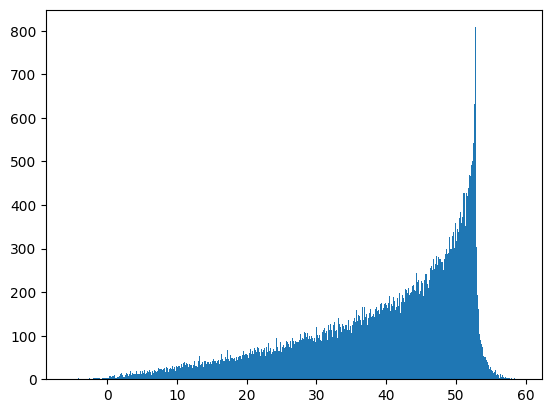

In [94]:
import matplotlib.pyplot as plt

energies2 = boosted_2.E
plt.hist(energies2, bins=1000)
plt.show()

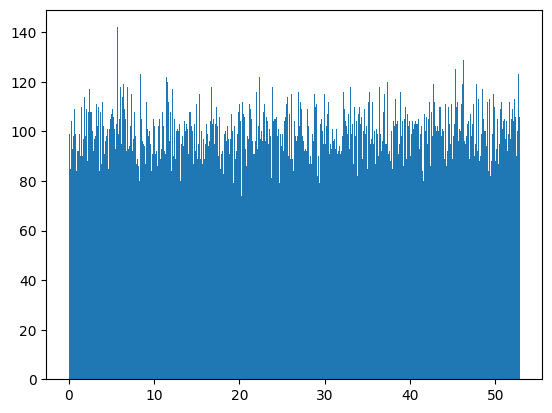

In [95]:
energies3 = daughter3.E
plt.hist(energies3, bins=1000)
plt.show()

Now let's make this a bit more realistic and add "weights" to this distribution to reflect the matrix element contributions. By https://arxiv.org/pdf/hep-ph/0203052, we can use equations 6 and 7 to weigh the electron antineutrino and muon neutrino distributions.

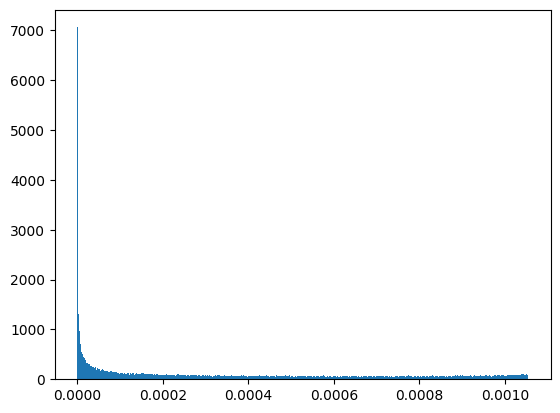

In [96]:
#muon neutrino

xmuon = 2*daughter3.E/mp
weight_muon = (xmuon**2)*(3.0-2*xmuon)

#normalize
tot_weight = np.sum(weight_muon)
norm_weight = weight_muon/tot_weight

#weighted distribution
muon_neut_dist = np.multiply(daughter3.E,norm_weight)

plt.hist(muon_neut_dist, bins=1000)
plt.show()